<h1><center>Vietnam Stock Market - Momentum Stategy</center></h1>
<h3><i>Content:</i></h3>
<h3>1. Problem statement</h3>
  <li>What is momentum</li>
  <li>Why & How you find it</li>
<h3>2. Data wrangling & EDA</h3>
  <li>Historgram</li>
  <li>Bolinger band, high-low band (breakout)</li>
  <li>View time series/cross sectional for pattern recognition</li>
  <li>Hypothesis refinement</li>
<h3>3. Stategy design</h3>
  <p>Candidate selection</p>
  <p>Risk model</p>
  <p>Alpha model</p>
  <p>Multi factor model</p>
  <p>Value at risk (volatility sizing)</p>
  <ul><li>Key metrics</li>
    <ol><li>CARG</li>
    <li>Standard Deviation</li>
    <li>Downside Deviation</li>
    <li>Sharpe Ratio</li>
    <li>Sortino Ratio (MAR = 5%)</li>
    <li>Worst Drawdown</li>
    <li>Best Month Return</li>
    <li>Profitable Months</li></ol></ul>
<h3>4. Backtesting</h3>
<h3>5. Conclusion</h3>

<h2>1. Problem statement</h2>  
<b>Investors will continue to suffer behavioral bias</b>
<p>Vietnam stock exchange is one of the most potential raising up players among frontier markets. The market is in the developing stage and lacking massive & advanced financial tools such as algo-trading (quantitative trading), an alternative of fundamental & technical analysis. Quant-trading with three main alpha factors: Value, Size, Momentum aiming an initial glance for investors on how the massive trading algorithm from the mature market is able to apply and beating the benchmark in frontier one.</p>

<b>What is momentum</b>  
<p><a href=https://www.investopedia.com/terms/m/momentum.asp>Momentum</a> is the rate of acceleration of a security's price—that is, the speed at which the price is changing. Momentum trading is a strategy that seeks to capitalize on momentum to enter a trend as it is picking up steam.The goal is to work with volatility by finding buying opportunities in short-term uptrends and then sell when the securities start to lose momentum.</p>
<b>Why is momentum</b>  
<p>Random walk theory suggests that changes in stock prices have the same distribution and are independent of each other. Stock prices are non-stationary (mean, variance, covariance is changed over time) then it is unlikely able to using the past price to predict the future one. Price is not comparable by time & among stocks</p>
<p> Many of the rationales presented for the strategy’s success fall into one of two behavioral categories: Investors either overreact to important information, or they underreact to it, that leads to momentum effect. Because, after all, we’re only human. (<a href=https://anderson-review.ucla.edu/momentum/>Subrahmanyam</a>) </p>
<p>Finding & modeling patterns (factors) from returns which is more stationary & comparable is the major trend, momentum is one of the most resilent factors</p>
<b>How to find momentum patterns</b>  
<p>Momentum, finance, refers to the capacity for a price trend to sustain itself going forward.</p>
<p>Strong momentum can continue in an upward or downward trend, which can be confirmed by changes in trading volume and other technical indicators.</p>
<p>Momentum investing is a trading strategy in which investors buy securities that are rising and sell them when they look to have peaked.</p>
<p>Momentum trading therefore describes a herding strategy, following others; but price trends are never guaranteed in the future.</p>

<b>To accomplish these tasks, the following steps need to be accomplished: Hypothesis construction; Data wrangling & EDA, Strategy design; Backtesting .</b>  
<b>The data are collected from : </b><a href=https://www.vndirect.com.vn/portal/thong-ke-thi-truong-chung-khoan/lich-su-gia.shtml>vndirect</a>
& <a href=https://s.cafef.vn/Lich-su-giao-dich-VNINDEX-1.chn#data>cafef</a>

<h2>2.  Data wrangling & EDA</h2>  

### Load Dependencies

In [1]:
import os
import numpy as np
import pandas as pd
# import cvxpy as cvx
# import zipline
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
import datetime

import functions  
import visualizations
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
plt.rcParams['figure.dpi'] = 120

### Load Data
The data we use for most of the projects is end of day data. This contains data for 621 stocks, but we'll be looking at stocks in the VN100. We also made things a little easier to run by narrowing down our range of time period instead of using all of the data.

In [2]:
engine = sqlalchemy.create_engine('sqlite:///' + 'vn621')
pd.read_sql('FPT', engine).head(2)
# pd.read_sql('select * from FPT', engine)

,date,open,high,low,close,volume,unadjusted,putthrough,ticker,year,quarter,dividend
0,2006-12-13,19.225752,19.225752,19.225752,19.225752,83530,400.0,0,FPT,2006,4,NaN
1,2006-12-14,20.187039,20.187039,20.187039,20.187039,280710,420.0,0,FPT,2006,4,NaN


In [3]:
tickers = np.array(pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'",engine)).flatten()

In [6]:
dfs = [pd.read_sql(ticker, engine) for ticker in tickers]

In [7]:
df = pd.concat(dfs,ignore_index=False)

In [8]:
df['date'] = pd.to_datetime(df.date)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402426 entries, 0 to 3647
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   date        1402426 non-null  datetime64[ns]
 1   open        1402426 non-null  float64       
 2   high        1402426 non-null  float64       
 3   low         1402426 non-null  float64       
 4   close       1402426 non-null  float64       
 5   volume      1402426 non-null  int64         
 6   unadjusted  1402426 non-null  float64       
 7   putthrough  1402426 non-null  int64         
 8   ticker      1402426 non-null  object        
 9   year        1402426 non-null  int64         
 10  quarter     1402426 non-null  int64         
 11  dividend    1009046 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(4), object(1)
memory usage: 139.1+ MB


In [25]:
df.isnull().sum()

open                         0
high                         0
low                          0
close                        0
volume                       0
unadjusted                   0
putthrough                   0
ticker                       0
year                         0
quarter                      0
dividend                393361
simple_return              796
log_return                 796
sma                          0
std                          0
upper                        0
lower                        0
bolinger_buy_signal          0
bolinger_sell_signal         0
dtype: int64

In [9]:
df['simple_return'] = df.groupby('ticker')['close'].pct_change()
df['log_return'] = np.log(1 + df.groupby('ticker')['close'].pct_change())

In [10]:
df = df.set_index('date')

In [10]:
df.head(2)

,open,high,low,close,volume,unadjusted,putthrough,ticker,year,quarter,dividend,simple_return,log_return
date,,,,,,,,,,,,,
2009-12-30,8.132920,8.132920,6.099690,6.912982,140500,17.0,0,AMV,2009,4,NaN,NaN,NaN
2009-12-31,7.034976,7.034976,7.034976,7.034976,48900,17.3,0,AMV,2009,4,NaN,0.017647,0.017493


In [11]:
FPT_prices = df[df['ticker'] == 'FPT']['close']
FPT_returns = df[df['ticker'] == 'FPT']['simple_return']
FPT_logreturns = df[df['ticker'] == 'FPT']['log_return']

In [13]:
fig = go.Figure()
fig.add_traces(go.Scatter(
    name='FPT close price',
    x=FPT_prices.index,
    y=FPT_prices,
    line={'color': 'black'},showlegend=True))
fig.update_layout(title = 'FPT price')

### Histogram

In [33]:
fig = make_subplots(rows=2, cols=3, column_widths=[0.4,0.4,0.4],row_heights=[0.6,0.6])
  
fig.add_trace(go.Box(x=FPT_prices,name ='Price',marker_color='rgb(16, 154, 246)'),
     row=1, col=1)
fig.add_trace(go.Box(x=FPT_returns,name ='Simple returns',marker_color='rgb(246, 52, 16)'),
    row=1, col=2)
fig.add_trace(go.Box(x=FPT_logreturns,name ='Log returns',marker_color='rgb(0, 0, 255)'),
    row=1, col=3)

fig.add_trace(go.Histogram(x=FPT_prices,
  marker_color='rgb(16, 154, 246)',name ='Price',showlegend=False), 
  row=2, col=1)
fig.add_trace(go.Histogram(x=FPT_returns,
  marker_color='rgb(246, 52, 16)',name ='Simple returns',showlegend=False), 
  row=2, col=2)
fig.add_trace(go.Histogram(x=FPT_logreturns,
  marker_color='rgb(0, 0, 255)',name ='Log returns',showlegend=False), 
  row=2, col=3)
fig.update_layout(height=400, width=1300, title_text='FPT Stock')

### Bolinger band


In [14]:
df['sma'] = df.close.rolling(window=20).mean()
df['std'] = df.close.rolling(window=20).std()

In [15]:
df['upper'] = df.sma + 2*df['std']
df['lower'] = df.sma - 2*df['std']

In [16]:
df['bolinger_buy_signal'] = np.where(df.lower > df.close, True, False)
df['bolinger_sell_signal'] = np.where(df.upper > df.close, True, False)

In [17]:
df.dropna(subset=['sma'], inplace=True)

In [18]:
df_bolinger = df[df['ticker'] == 'FPT']

In [21]:
import plotly.graph_objs as go
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

def plot_bolinger(prices,title):
    fig = go.Figure()
    layout = go.Layout(title=title)

    fig.add_traces(go.Scatter(
        name='close',
        x=prices.index,
        y=prices.close,
        line={'color': 'black'}))
    fig.add_traces(go.Scatter(
        name='monthly_sma',
        x=prices.index,
        y=prices.sma,
        line={'color': 'red'}))
    fig.add_traces(go.Scatter(
        x=prices.index,
        y=prices.upper,
        name='monthly_bolinger_high_band',
        fill=None,
        line={'color':'#2D3ECF'},showlegend=True))
    fig.add_traces(go.Scatter(
        x=prices.index,
        y=prices.lower,
        name='monthly_bolinger_low_band',
        fill='tonexty',
        fillcolor='rgba(0,250,0,0.3)',
        line={'color': '#B6B2CF'},showlegend=True))

    pyo.iplot({'data': fig, 'layout': layout})


In [22]:
plot_bolinger(df_bolinger.iloc[3000:],'Bolinger band')

In [ ]:
# plt.plot(df_bolinger[['close','sma','upper','lower']])
# plt.scatter(df_bolinger.index[df_bolinger['bolinger_buy_signal']],\
#   df_bolinger[df_bolinger['bolinger_buy_signal']].close, marker='^',color='g')
# plt.scatter(df_bolinger.index[df_bolinger['bolinger_sell_signal']],\
#   df_bolinger[df_bolinger['bolinger_sell_signal']].close, marker='v',color='b')
# plt.fill_between(df_bolinger.iloc[3000:].index, df_bolinger.iloc[3000:].upper,\
#   df_bolinger.iloc[3000:].lower,color='red',alpha=0.3)
# plt.legend(['close','sma','upper','lower'])
# plt.show()

### High-low band (breakout)

In [29]:
close = df.reset_index().pivot(index='date', columns='ticker', values='close')
high = df.reset_index().pivot(index='date', columns='ticker', values='high')
low = df.reset_index().pivot(index='date', columns='ticker', values='low')

In [30]:
lookback_days = 20
lookback_high, lookback_low = functions.get_high_lows_lookback(high, low, lookback_days)
visualizations.plot_high_low(
    close['FPT'].iloc[3000:],
    lookback_high['FPT'].iloc[3000:],
    lookback_low['FPT'].iloc[3000:],
    'High and Low of {} Stock'.format('FPT'))

### View time series/cross sectional for pattern recognition

#### Time series analysis
[Momentum Strategy](https://teddykoker.com/2019/05/momentum-strategy-from-stocks-on-the-move-in-python/)

In [32]:
monthly_close = functions.resample_prices(df['close'])
monthly_returns = functions.compute_log_returns(monthly_close)
prev_returns = functions.shift_returns(monthly_returns, 1)
lookahead_returns = functions.shift_returns(monthly_returns, -1)

In [31]:
from scipy.stats import linregress

def momentum(closes):
    returns = np.log(closes)
    x = np.arange(len(returns))
    slope, _, rvalue, _, _ = linregress(x, returns)
    return ((1 + slope) ** 252) * (rvalue ** 2)  # annualize slope and multiply by R^2

In [33]:
momentums = close.copy(deep=True)
for ticker in tickers:
    momentums[ticker] = close[ticker].rolling(90).apply(momentum, raw=False)


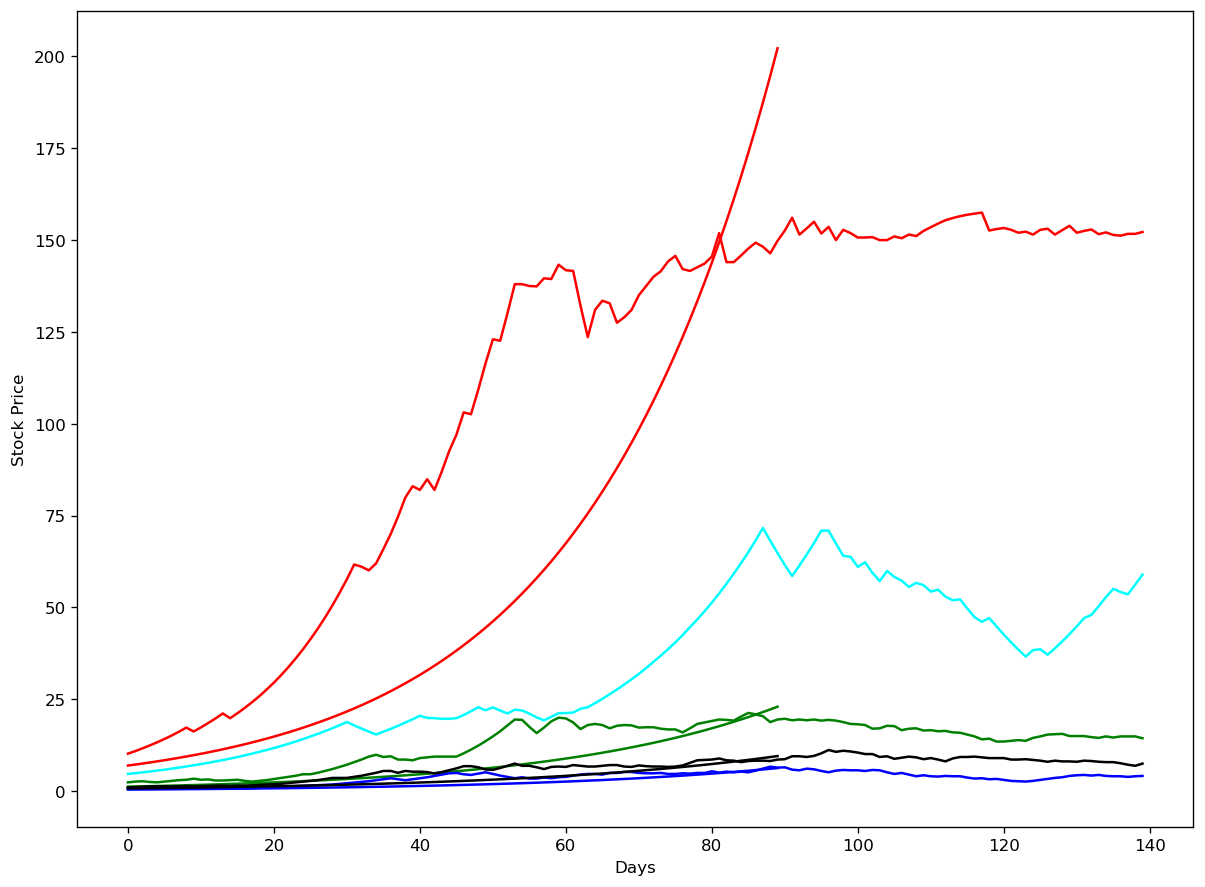

In [45]:
plt.figure(figsize=(12, 9))
plt.xlabel('Days')
plt.ylabel('Stock Price')
colors = ['red','green','blue','cyan','black']
bests = momentums.max().sort_values(ascending=False).index[:5]
for color, best in zip(colors,bests):
    end = momentums[best].index.get_loc(momentums[best].idxmax())
    rets = np.log(close[best].iloc[end - 90 : end])
    x = np.arange(len(rets)) #90 days
    slope, intercept, r_value, p_value, std_err = linregress(x, rets)
    plt.plot(np.arange(140), close[best][end-70:end+70], color=color)
    plt.plot(x, np.e ** (intercept + slope*x), color=color)

#### Cross sectional analysis

In [10]:
df.set_index('date') # Set the date as the index so we can add the index mean retrun for that day

df['index_mean_simple_return'] =  df.groupby('date')['simple_return'].apply(lambda x: x.mean())#We are using apply here instead of transform because apply can handle grouped outputs 

df['index_mean_log_return'] =  df.groupby('date')['log_return'].apply(lambda x: x.mean())

df['demeaned_return']  = df['simple_return'] - df['index_mean_simple_return']
df['demeaned_log_return']  = df['log_return'] - df['index_mean_log_return']

df.reset_index(inplace=True)#Reset index making the date a column again (lets us use it in calculations)

In [11]:
df['3m'] = np.log(1 + df.groupby('ticker')['close'].pct_change(periods = 60))
df['12m'] = np.log(1 + df.groupby('ticker')['close'].pct_change(periods = 220))

In [12]:
df['target-1'] = df.groupby('ticker')['close'].transform(lambda target: np.log(target.shift(-1)/target)) #One day ahead
df['target-2'] = df.groupby('ticker')['close'].transform(lambda target: np.log(target.shift(-5)/target)) #One week ahead
df['target-3'] = df.groupby('ticker')['close'].transform(lambda target: np.log(target.shift(-20)/target)) #One month ahead
df['target-4'] = df.groupby('ticker')['close'].transform(lambda target: np.log(target.shift(-60)/target)) #One half ahead
df['target-5'] = df.groupby('ticker')['close'].transform(lambda target: np.log(target.shift(-120)/target)) #One year ahead

In [13]:
df.head(2)

,index,date,open,high,low,close,volume,unadjusted,putthrough,ticker,...,index_mean_log_return,demeaned_return,demeaned_log_return,3m,12m,target-1,target-2,target-3,target-4,target-5
0,0,2009-12-30,8.132920,8.132920,6.099690,6.912982,140500,17.0,0,AMV,...,NaN,NaN,NaN,NaN,NaN,0.017493,0.132060,-0.131852,-0.152192,-0.042048
1,1,2009-12-31,7.034976,7.034976,7.034976,7.034976,48900,17.3,0,AMV,...,NaN,NaN,NaN,NaN,NaN,0.067064,0.114567,-0.156079,-0.142656,-0.090697


In [14]:
momentum_factor = pd.pivot_table(df,index='3m',values=['target-1','target-2','target-3','target-4','target-5'],aggfunc='mean')

In [15]:
momentum_factor.head()

,target-1,target-2,target-3,target-4,target-5
3m,,,,,
-inf,inf,inf,inf,inf,inf
-2.794760,0.063179,0.322399,0.265703,0.083382,0.330242
-2.759343,0.051293,0.351398,0.456758,0.793231,1.044545
-2.724914,0.064220,0.206682,0.189945,0.005089,0.327687
-2.723164,-0.068268,0.189067,0.265872,0.030002,0.209858


In [16]:
df['3m_bucket'] = functions.bucketing_factors(df['3m'],10)
df['12m_bucket'] = functions.bucketing_factors(df['12m'],10)

<AxesSubplot:title={'center':'Factor of 3m_bucket'}, xlabel='3m_bucket'>

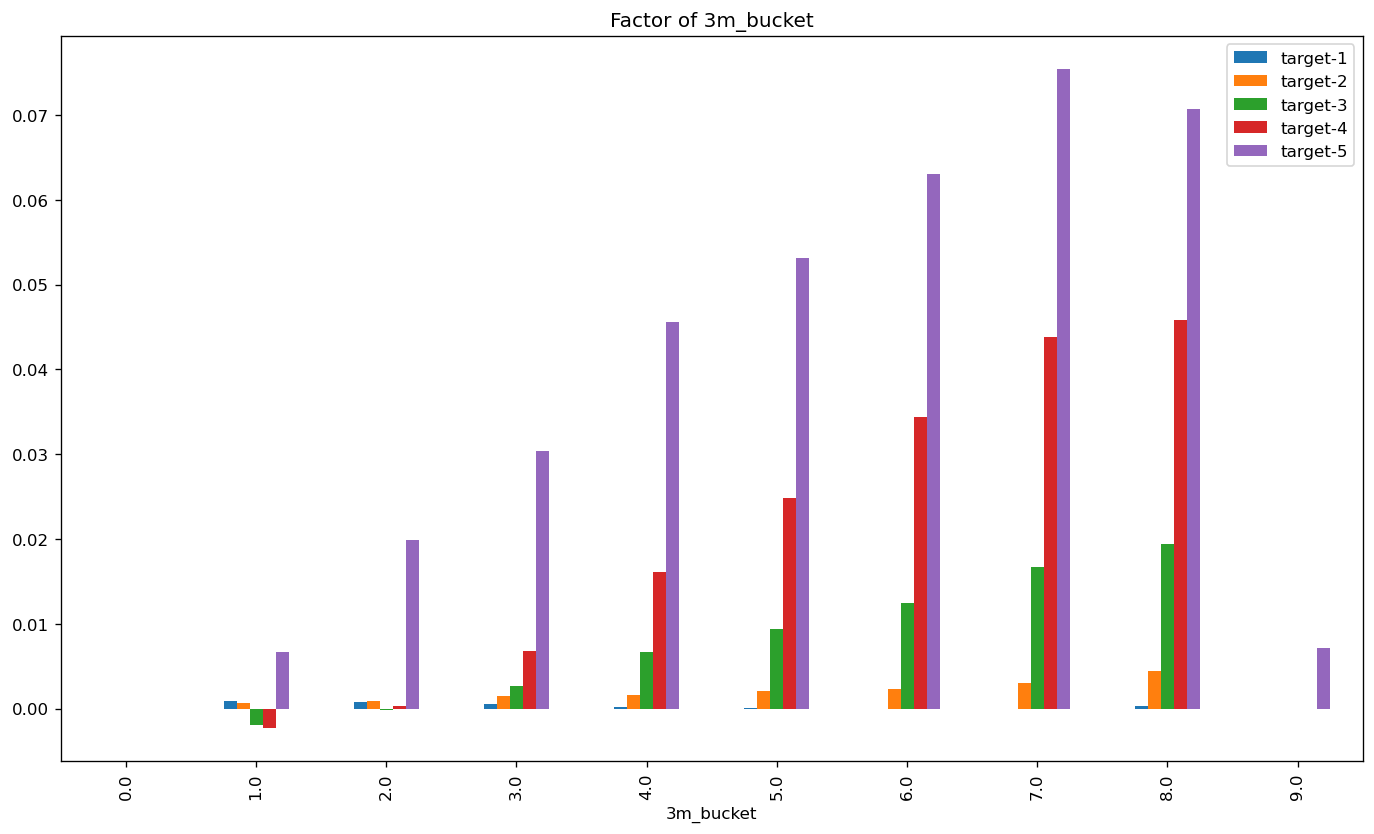

In [17]:
visualizations.plot_bar(df, '3m_bucket')

<AxesSubplot:title={'center':'Factor of 12m_bucket'}, xlabel='12m_bucket'>

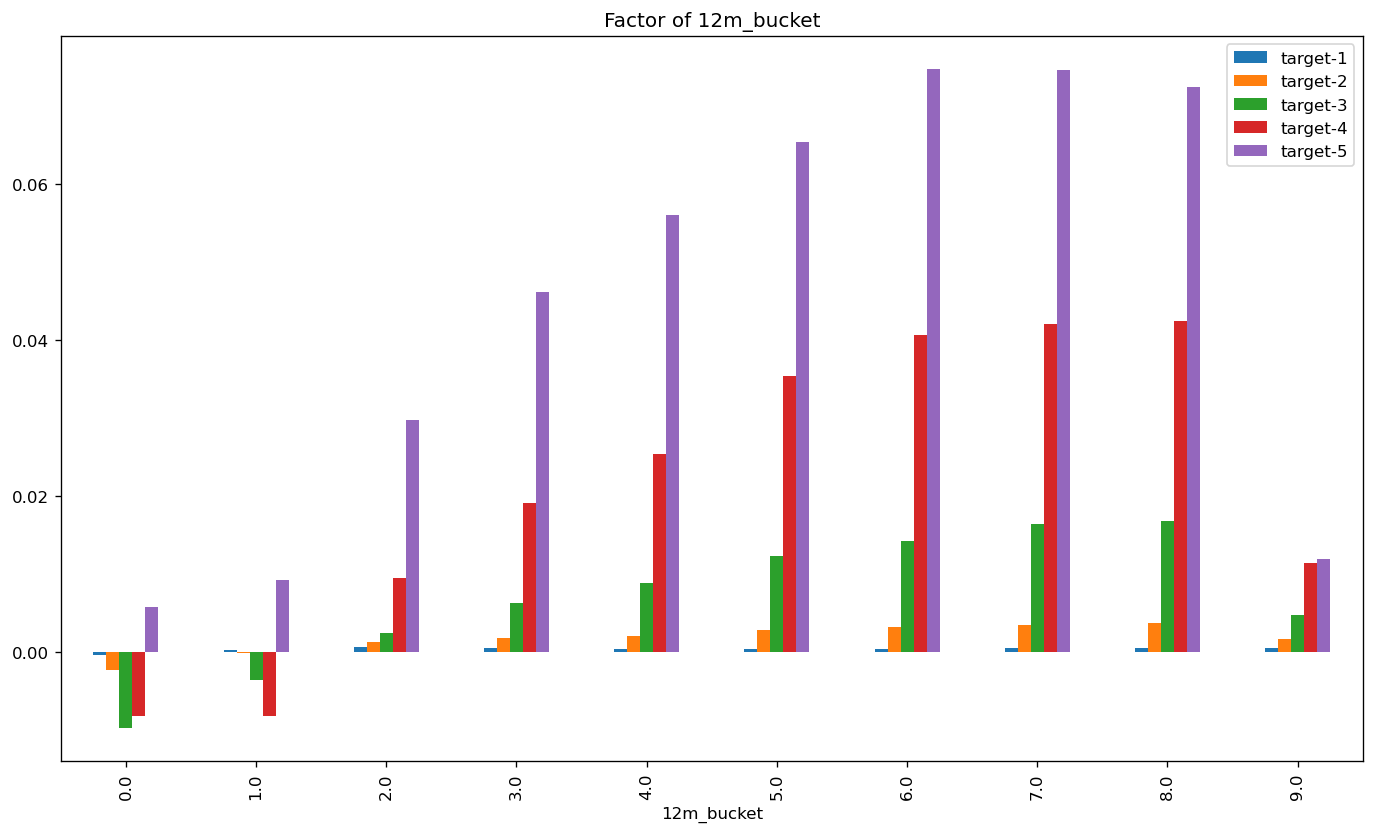

In [70]:
visualizations.plot_bar(df, '12m_bucket')

In [71]:
momen_factor_year = pd.pivot_table(df,index=['3m_bucket','year'],values='target-1',aggfunc='mean').reset_index()

In [72]:
momen_factor_year['annualised'] = momen_factor_year['target-1']*252

In [80]:
#10 quantiles in 16 years
print(momen_factor_year)

     3m_bucket  year  target-1  annualised
0          0.0  2006  0.000246    0.061890
1          0.0  2007  0.001490    0.375406
2          0.0  2008 -0.005826   -1.468137
3          0.0  2009  0.001976    0.498064
4          0.0  2010       inf         inf
..         ...   ...       ...         ...
155        9.0  2017  0.000474    0.119559
156        9.0  2018 -0.002566   -0.646689
157        9.0  2019 -0.001503   -0.378762
158        9.0  2020 -0.000166   -0.041738
159        9.0  2021  0.002292    0.577613

[160 rows x 4 columns]


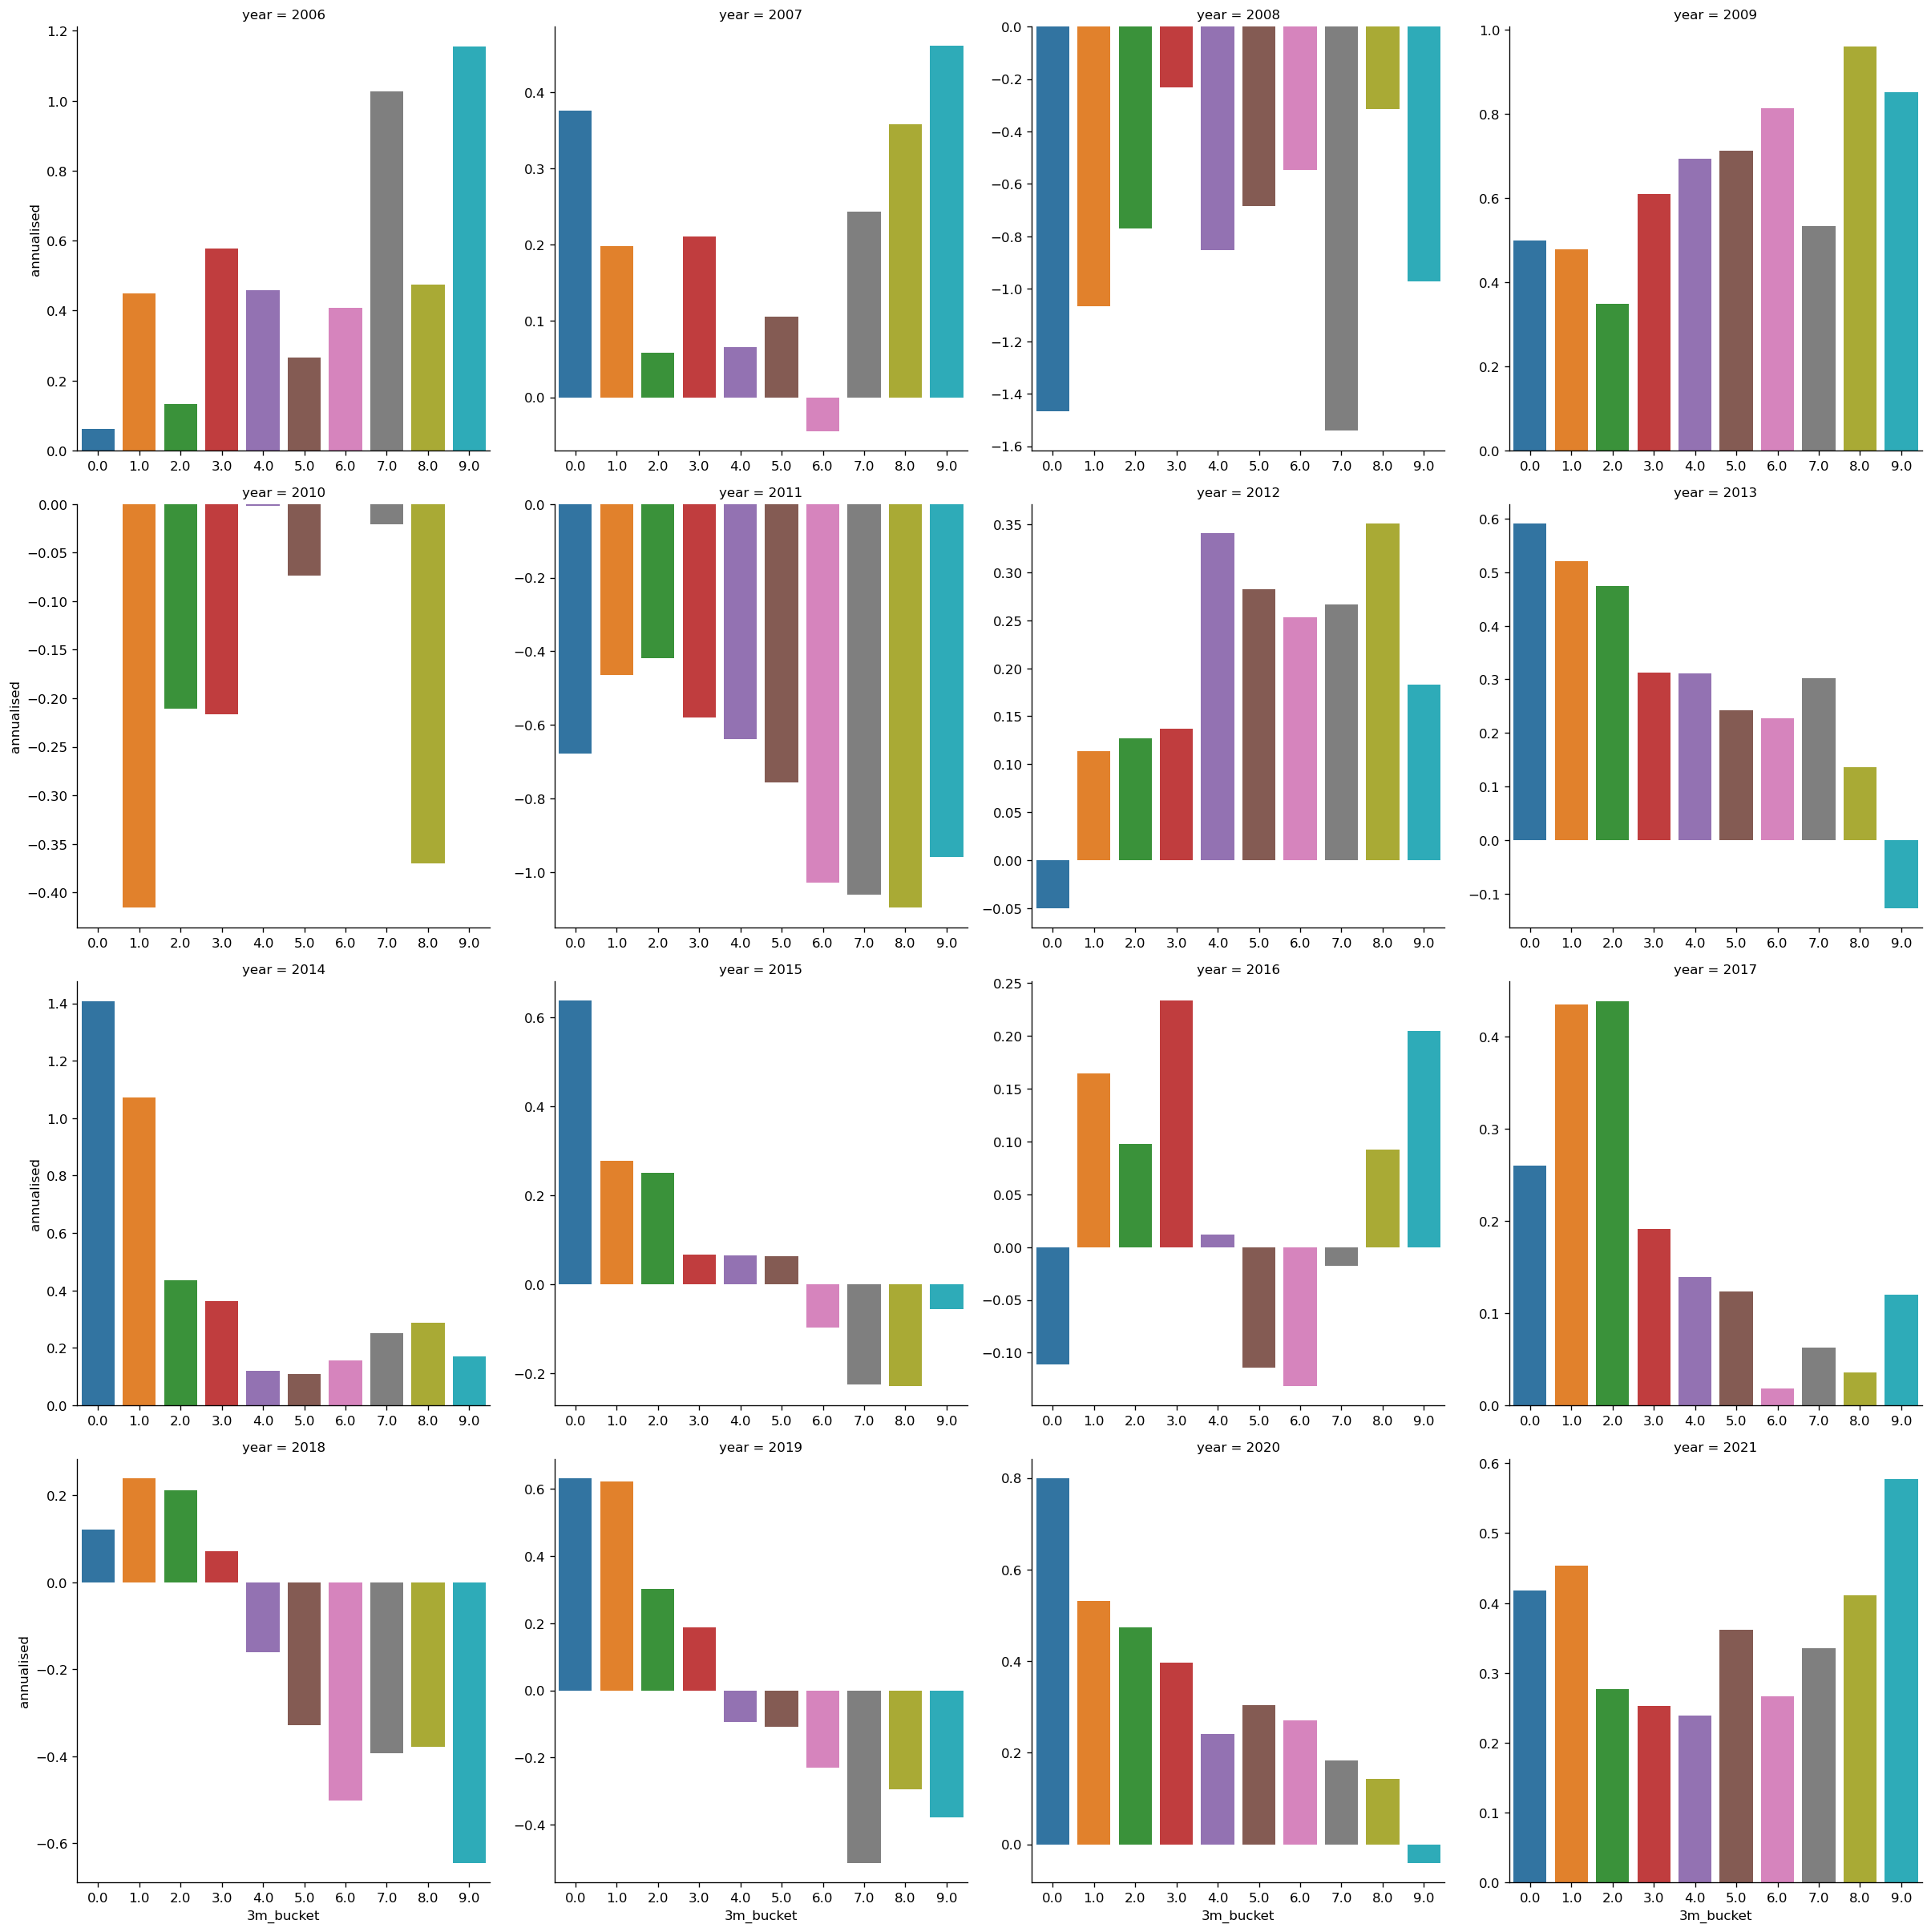

In [75]:
sns.catplot(x='3m_bucket',y='annualised',data=momen_factor_year,kind='bar',col='year',col_wrap=4,sharey=False,sharex=False);

### Hypothesis refinement

Monthly, quarterly & yearly momentum indicators have been observed both in time series & cross sectional analysis, they are considered as the long-term alpha factors. The other indicators such as mean reversion & overnight sentiment - seasonality, both are short-time factors, should be taken into account in the model.

<h2>3. Stategy design</h2>

A typical momentum strategy will buy stocks that have been showing an upward trend in hopes that the trend will continue and sell stocks showing a weak upward trend, even downward one in a specific time window. Momentum indicator is only used for ranking the stocks, not for price prediction.  
Momentum is almost the opposite of mean-reversion effect, accompany with seasonality as the key factors for portfolio alpha model.  
Alpha model operating under risk factors & weight scheme influnces will be a real-world portfolio simulation (backtest). The model outcomes then are qualtified by perfomance metrics, by that investors/portfolio managers quantitatively make up their decision

### Candidate selection
<li>Filter by volume</li>
<li>Filter by dividend</li>
<li>Filter by VN100 index</li>
<li>Filter by VN30 index</li>

<h4>Zipline data ingestion & bundle construction</h4>

In [ ]:
from zipline.data import bundles
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import AverageDollarVolume
from zipline.utils.calendars import get_calendar

In [ ]:
os.environ['ZIPLINE_ROOT'] = os.path.join(os.getcwd(), 'data','project_4_eod')

ingest_func = bundles.csvdir.csvdir_equities(['daily'], 'eod-quotemedia')
bundles.register('eod-quotemedia', ingest_func)

print('Data Registered')

In [ ]:
universe = AverageDollarVolume(window_length=120).top(500) 
trading_calendar = get_calendar('NYSE') 
bundle_data = bundles.load('eod-quotemedia')
engine = functions.build_pipeline_engine(bundle_data, trading_calendar)

In [ ]:
universe_end_date = pd.Timestamp('2021-09-01', tz='UTC')

universe_tickers = engine\
    .run_pipeline(
        Pipeline(screen=universe),
        universe_end_date,
        universe_end_date)\
    .index.get_level_values(1)\
    .values.tolist()
    
universe_tickers[:5]

In [ ]:
from zipline.data.data_portal import DataPortal


data_portal = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader)

In [ ]:
def get_pricing(data_portal, trading_calendar, assets, start_date, end_date, field='close'):
    end_dt = pd.Timestamp(end_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')
    start_dt = pd.Timestamp(start_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')

    end_loc = trading_calendar.closes.index.get_loc(end_dt)
    start_loc = trading_calendar.closes.index.get_loc(start_dt)

    return data_portal.get_history_window(
        assets=assets,
        end_dt=end_dt,
        bar_count=end_loc - start_loc,
        frequency='1d',
        field=field,
        data_frequency='daily')

In [ ]:
ten_year_returns = \
    get_pricing(
        data_portal,
        trading_calendar,
        universe_tickers,
        universe_end_date - pd.DateOffset(years=10),
        universe_end_date)\
    .pct_change()[1:].fillna(0)

ten_year_returns.head(2)

<h3>3.1. Key metrics</h3>

<h4>CARG</h4>    

<h4>Standard Deviation</h4>

<h4>Downside Deviation</h4>

<h4>Sharpe Ratio</h4>

<h4>Sortino Ratio (MAR = 5%)</h4>

<h4>Worst Drawdown</h4>

<h4>Best Month Return</h4>

<h4>Profitable Months</h4>

<h3>3.2. Risk model</h3>

<h3>3.3. Alpha model</h3>

<h3>3.4. Multi factor model</h3>

<h3>3.5. Value at risk (volatility sizing)</h3>

<h2>4. Backtesting</h2>

<h2>5. Conclusion</h2>